In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
import datetime
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

ticker = 'AAPL'

end_date = datetime.datetime(2023, 8, 1)

start_date = end_date - datetime.timedelta(days=365*3)

apple_data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [12]:
apple_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-03,108.199997,111.637497,107.892502,108.937500,106.955017,308151200
2020-08-04,109.132500,110.790001,108.387497,109.665001,107.669289,173071600
2020-08-05,109.377502,110.392502,108.897499,110.062500,108.059547,121776800
2020-08-06,110.404999,114.412498,109.797501,113.902496,111.829666,202428800
2020-08-07,113.205002,113.675003,110.292503,111.112503,109.287140,198045600
...,...,...,...,...,...,...
2023-07-25,193.330002,194.440002,192.919998,193.619995,193.619995,37283200
2023-07-26,193.669998,195.639999,193.320007,194.500000,194.500000,47471900
2023-07-27,196.020004,197.199997,192.550003,193.220001,193.220001,47460200


In [13]:
apple_data.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2020-08-03 to 2023-07-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       753 non-null    float64
 1   High       753 non-null    float64
 2   Low        753 non-null    float64
 3   Close      753 non-null    float64
 4   Adj Close  753 non-null    float64
 5   Volume     753 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.2 KB


In [14]:
apple_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-03,108.199997,111.637497,107.892502,108.937500,106.955017,308151200
2020-08-04,109.132500,110.790001,108.387497,109.665001,107.669289,173071600
2020-08-05,109.377502,110.392502,108.897499,110.062500,108.059547,121776800
2020-08-06,110.404999,114.412498,109.797501,113.902496,111.829666,202428800
2020-08-07,113.205002,113.675003,110.292503,111.112503,109.287140,198045600


In [15]:
apple_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,753.000000,753.000000,753.000000,753.000000,753.000000,7.530000e+02
mean,146.988669,148.742175,145.332457,147.107258,145.975278,9.160970e+07
std,20.159802,20.244665,20.212121,20.258677,20.633988,4.029075e+07
min,104.540001,110.190002,103.099998,106.839996,105.084824,3.145820e+07
25%,131.250000,132.550003,129.639999,131.399994,129.772079,6.549670e+07
50%,146.850006,148.500000,145.520004,146.830002,145.653137,8.222550e+07
75%,161.630005,164.389999,159.750000,162.360001,161.536682,1.058613e+08
max,196.059998,198.229996,195.259995,196.449997,196.449997,3.459376e+08


In [16]:
apple_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [17]:
apple_data.duplicated().sum()

0

In [18]:
apple_data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

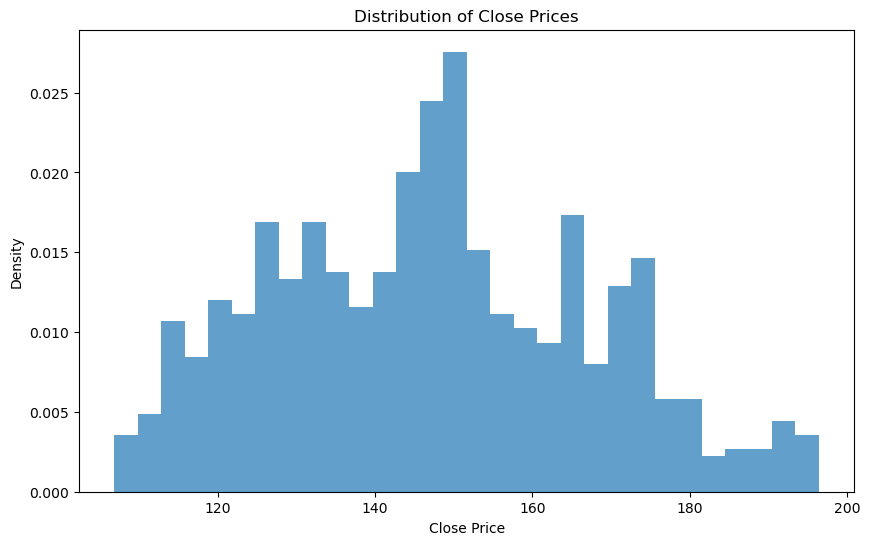

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.hist(apple_data['Close'], bins=30, density=True, alpha=0.7)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.show()

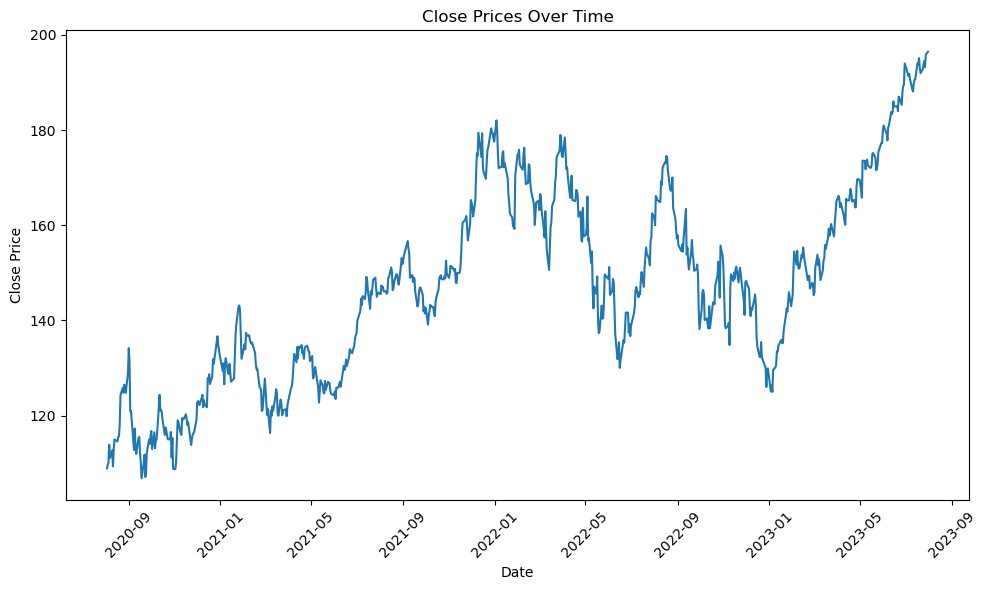

In [20]:
plt.figure(figsize=(10, 6))

plt.plot(apple_data.index, apple_data['Close'])
plt.title('Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

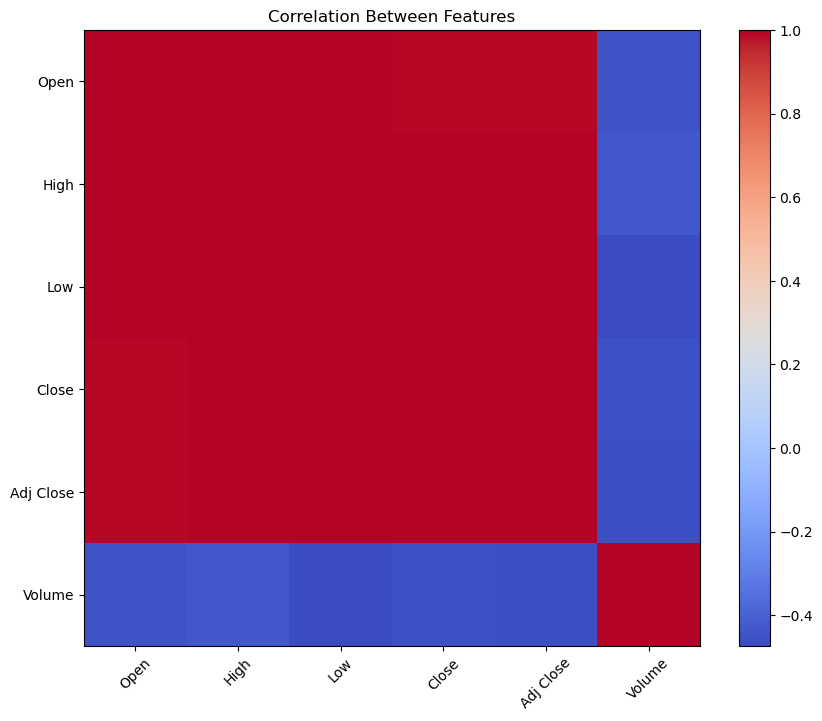

In [21]:
corr = apple_data.corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Between Features')
plt.xticks(np.arange(len(corr)), corr.columns, rotation=45)
plt.yticks(np.arange(len(corr)), corr.columns)
plt.show()

In [26]:
apple_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-03,108.199997,111.637497,107.892502,108.937500,106.955017,308151200
2020-08-04,109.132500,110.790001,108.387497,109.665001,107.669289,173071600
2020-08-05,109.377502,110.392502,108.897499,110.062500,108.059547,121776800
2020-08-06,110.404999,114.412498,109.797501,113.902496,111.829666,202428800
2020-08-07,113.205002,113.675003,110.292503,111.112503,109.287140,198045600
...,...,...,...,...,...,...
2023-07-25,193.330002,194.440002,192.919998,193.619995,193.619995,37283200
2023-07-26,193.669998,195.639999,193.320007,194.500000,194.500000,47471900
2023-07-27,196.020004,197.199997,192.550003,193.220001,193.220001,47460200


In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
apple_scaled = pd.DataFrame(scaler.fit_transform(apple_data), columns=apple_data.columns, index=apple_data.index)

In [28]:
apple_scaled

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-03,0.039991,0.016441,0.052002,0.023407,0.020469,0.879845
2020-08-04,0.050180,0.006815,0.057373,0.031526,0.028287,0.450311
2020-08-05,0.052857,0.002300,0.062907,0.035961,0.032559,0.287200
2020-08-06,0.064084,0.047961,0.072673,0.078814,0.073823,0.543662
2020-08-07,0.094679,0.039584,0.078044,0.047679,0.045995,0.529724
...,...,...,...,...,...,...
2023-07-25,0.970171,0.956951,0.974609,0.968419,0.969025,0.018523
2023-07-26,0.973885,0.970582,0.978950,0.978239,0.978657,0.050921
2023-07-27,0.999563,0.988301,0.970595,0.963955,0.964647,0.050884


In [29]:
X = apple_data.drop('Close', axis=1)
y = apple_data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
len(X_train)

602

In [31]:
len(X_test)

151

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.18862121467704604


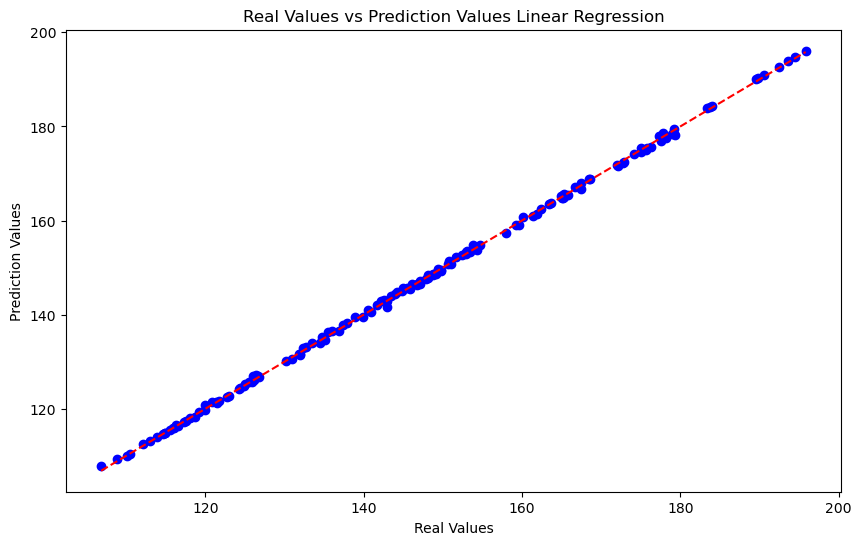

In [33]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Real Values')
plt.ylabel('Prediction Values')
plt.title('Real Values vs Prediction Values Linear Regression')
plt.show()

In [34]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.01)  
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Mean Squared Error:", mse_lasso)

Lasso Mean Squared Error: 0.20706966837006213


C:\Users\jpilo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.458e+01, tolerance: 2.337e+01
  model = cd_fast.enet_coordinate_descent(


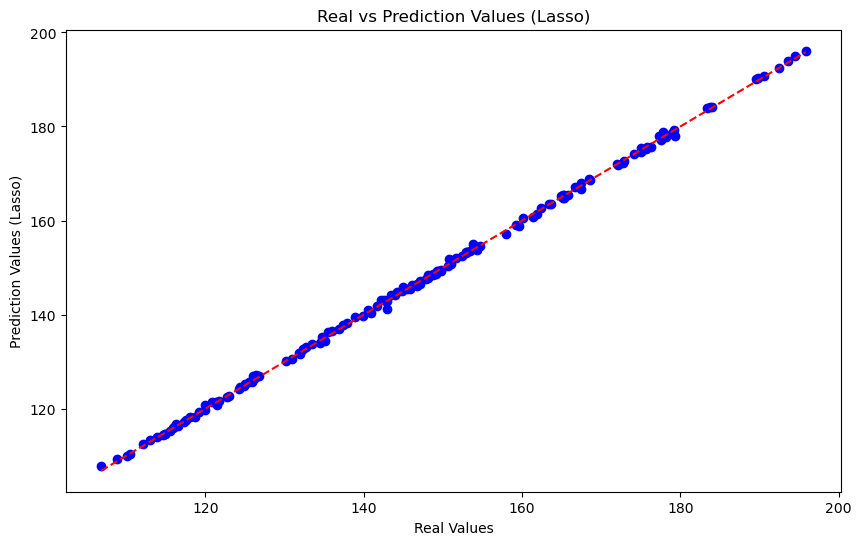

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Real Values')
plt.ylabel('Prediction Values (Lasso)')
plt.title('Real vs Prediction Values (Lasso)')
plt.show()

In [36]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print("Decision Tree Mean Squared Error:", mse_tree)

Decision Tree Mean Squared Error: 0.4817332132269986


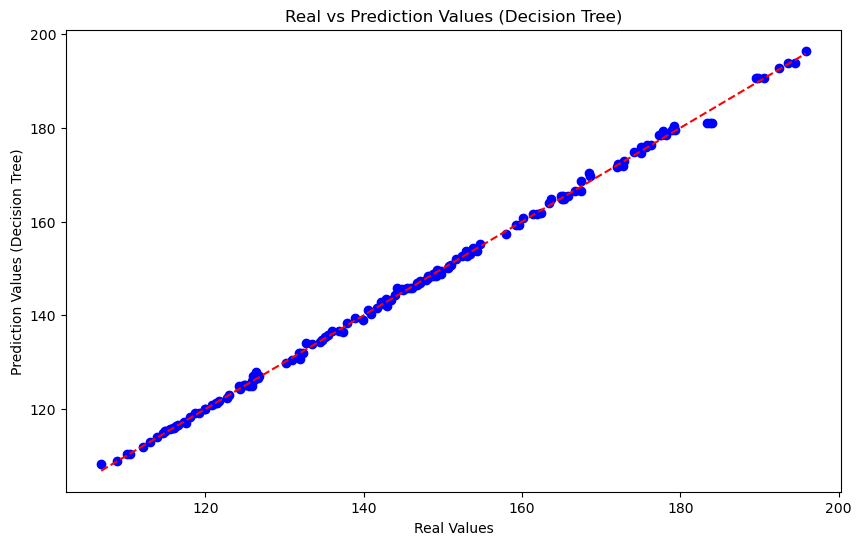

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Real Values')
plt.ylabel('Prediction Values (Decision Tree)')
plt.title('Real vs Prediction Values (Decision Tree)')
plt.show()